## understanding

### objetivo

**A doença**


O coronavírus (COVID-19) é uma doença infecciosa causada . A maioria das pessoas infectadas com o vírus COVID-19 apresentará doença respiratória leve a moderada e se recuperará sem a necessidade de tratamento especial. As pessoas mais velhas e aquelas com problemas médicos subjacentes, como doenças cardiovasculares, diabetes, doenças respiratórias crônicas e câncer, são as que podem sofrer mais com o COVID-19.

O principal objetivo deste projeto é construir um modelo de aprendizado de máquina que, considerando o **sintoma atual, o status e o histórico médico** de um paciente com Covid-19, preveja se o paciente está em **alto risco ou não.**

### variáveis

Dados fornecidos pelo governo mexicano [- Saiba mais](https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico). 

O dataset contém um grande número de informações anônimas relacionadas ao paciente, incluindo pré-condições e o histórico médico. 

**O conjunto de dados brutos consiste em 21 características únicas e 1.048.576 pacientes únicos. Nas variáveis booleanas, 1 significa "sim" e 2 significa "não". valores como 97, 98 e 99 são dados ausentes .**


**sex**: sexo: 1 para feminino e 2 para masculino.

**age**: idade do paciente.

**classification**: Os valores 1-3 significam que o paciente foi diagnosticado com covid em diferentes graus. 4 ou superior significa que o paciente não é portador de covid ou que o teste é inconclusivo.

**patient type**: tipo de atendimento que o paciente recebeu na unidade. 1 para regresso a casa e 2 para internamento.

**pneumonia**: se o paciente já tem inflamação dos "air sacs" ou não.

**pregnancy**: se a paciente está grávida ou não.

**diabetes**: se o paciente tem diabetes ou não.

**copd**: Indica se o paciente tem doença pulmonar obstrutiva crônica ou não.

**asthma**: se o paciente tem asma ou não.

**inmsupr**: se o paciente é [imunossuprimido](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/immunosuppressed) ou não.

**hypertension**: se o paciente tem hipertensão ou não.

**cardiovascular**: se o paciente tem doença relacionada ao coração ou aos vasos sanguíneos.

**renal chronic**: se o paciente tem doença renal crônica ou não.

**other diseas**: se o paciente tem outra doença ou não.

**obesity**: se o paciente é obeso ou não.

**tobacco**: se o paciente é tabagista ou não.

**usmr**: indica se o paciente tratou unidades médicas de primeiro, segundo ou terceiro nível.

**medical unit**: tipo de instituição que prestou o atendimento.

**intubed**: se o paciente estava entubado.

**icu**: Indica se o paciente foi internado em uma Unidade de Terapia Intensiva.

**date died**: se o paciente faleceu indicar a data do falecimento, caso contrário 9999-99-99.

## loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv('data/covid.csv', sep=',')

## pre-tratamento de dados

como os dados auxentes não possuem um valor NaN, e sim um valor 97 ou 99, precisamos desenvolver uma função que analise os dados auxentes em cada variável, e os substitua por valores NaN, vamos fazer isso usando chatgpt e modularização organica

In [2]:
# tamanho do dataset
data.shape

(1048575, 21)

In [3]:
# renomeando os labels
data.rename(columns= lambda x:x.casefold(), inplace=True)

In [4]:
# tratando valores auxentes
df = data.drop(labels='age', axis=1).replace([97, '9999-99-99', 98, 99], np.nan)
df.loc[:,'age'] = data.loc[:,'age']

In [5]:
# convertendo as datas para datetime
df['date_died'] = pd.to_datetime(df['date_died'], format='%d/%m/%Y') 

In [6]:
# adicionando a coluna de vivo_morto
# 1 = survived
# 2 morto = dead
df['dead'] = df['date_died'].map(lambda x: 2 if type(x) == pd._libs.tslibs.nattype.NaTType else 1)
df

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,pregnant,diabetes,copd,...,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu,age,dead
0,2,1,1,1,2020-05-03,NaN,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,65,1
1,2,1,2,1,2020-06-03,NaN,1.0,NaN,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,72,1
2,2,1,2,2,2020-06-09,1.0,2.0,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,55,1
3,2,1,1,1,2020-06-12,NaN,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,53,1
4,2,1,2,1,2020-06-21,NaN,2.0,NaN,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,NaN,2.0,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,40,2
1048571,1,13,2,2,NaT,2.0,2.0,NaN,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,51,2
1048572,2,13,2,1,NaT,NaN,2.0,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,55,2
1048573,2,13,2,1,NaT,NaN,2.0,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,28,2


# Estudando cada variável

Nesta fase vou estudar o significado de cada variável e analisar suas propriedades estatísticas, além disso, a medida que eu for fazendo a análise exploratória vou anotando hipóteses nulas que possam me ocorrer, como por exemplo: "pessoas jovens tem menos chances de falecer por conta do vírus ?"

## usmer

In [19]:
# distribuição de frequências
print(df['usmer'].value_counts())
px.bar(df['usmer'].value_counts())

2    662903
1    385672
Name: usmer, dtype: int64


## medical unit

In [21]:
# distribuição de frequências
print(df['medical_unit'].value_counts())
px.bar(df['medical_unit'].value_counts())

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: medical_unit, dtype: int64


## sex

In [22]:
# distribuição de frequências
print(df['sex'].value_counts())
px.bar(df['sex'].value_counts())

1    525064
2    523511
Name: sex, dtype: int64


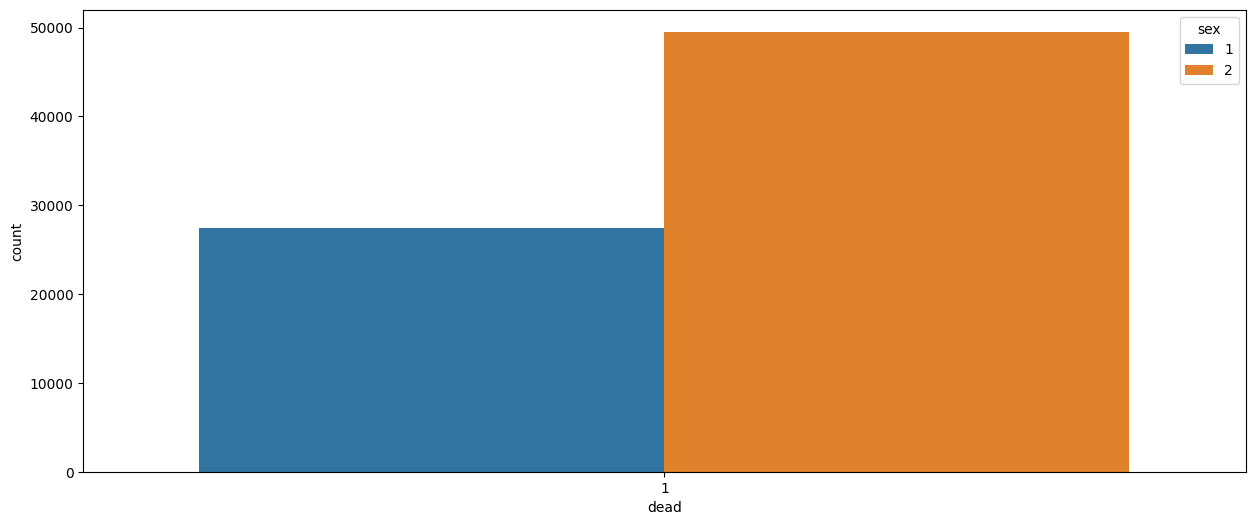

In [14]:
# correlação do sexo com a mortalidade
plt.figure(figsize=(15, 6))

sns.countplot(data=df[df['dead'] == 1], x='dead', hue='sex')
plt.show()

## patient_type

In [24]:
# distribuição de frequências
print(df['patient_type'].value_counts())
px.bar(df['patient_type'].value_counts())

1    848544
2    200031
Name: patient_type, dtype: int64


## date_died

In [25]:
# distribuição de frequências
print(df['date_died'].value_counts())
px.bar(df['date_died'].value_counts())

2020-07-06    1000
2020-07-07     996
2020-07-13     990
2020-06-16     979
2020-07-16     938
              ... 
2021-02-26       1
2021-02-11       1
2021-02-10       1
2021-02-01       1
2021-04-22       1
Name: date_died, Length: 400, dtype: int64


## intubed

In [26]:
# distribuição de frequências
print(df['intubed'].value_counts())
px.bar(df['intubed'].value_counts())

2.0    159050
1.0     33656
Name: intubed, dtype: int64


## pneumonia

In [27]:
# distribuição de frequências
print(df['pneumonia'].value_counts())
px.bar(df['pneumonia'].value_counts())

2.0    892534
1.0    140038
Name: pneumonia, dtype: int64


## pregnant

In [28]:
# distribuição de frequências
print(df['pregnant'].value_counts())
px.bar(df['pregnant'].value_counts())

2.0    513179
1.0      8131
Name: pregnant, dtype: int64


## diabetes

In [29]:
# distribuição de frequências
print(df['diabetes'].value_counts())
px.bar(df['diabetes'].value_counts())

2.0    920248
1.0    124989
Name: diabetes, dtype: int64


## copd

In [30]:
# distribuição de frequências
print(df['copd'].value_counts())
px.bar(df['copd'].value_counts())

2.0    1030510
1.0      15062
Name: copd, dtype: int64


## asthma

In [31]:
# distribuição de frequências
print(df['asthma'].value_counts())
px.bar(df['asthma'].value_counts())

2.0    1014024
1.0      31572
Name: asthma, dtype: int64


## inmsupr

In [32]:
# distribuição de frequências
print(df['inmsupr'].value_counts())
px.bar(df['inmsupr'].value_counts())

2.0    1031001
1.0      14170
Name: inmsupr, dtype: int64


## hipertension

In [33]:
# distribuição de frequências
print(df['hipertension'].value_counts())
px.bar(df['hipertension'].value_counts())

2.0    882742
1.0    162729
Name: hipertension, dtype: int64


## other_disease

In [34]:
# distribuição de frequências
print(df['other_disease'].value_counts())
px.bar(df['other_disease'].value_counts())

2.0    1015490
1.0      28040
Name: other_disease, dtype: int64


## cardiovascular

In [35]:
# distribuição de frequências
print(df['cardiovascular'].value_counts())
px.bar(df['cardiovascular'].value_counts())

2.0    1024730
1.0      20769
Name: cardiovascular, dtype: int64


## obesity

In [36]:
# distribuição de frequências
print(df['obesity'].value_counts())
px.bar(df['obesity'].value_counts())

2.0    885727
1.0    159816
Name: obesity, dtype: int64


## renal_chronic

In [37]:
# distribuição de frequências
print(df['renal_chronic'].value_counts())
px.bar(df['renal_chronic'].value_counts())

2.0    1026665
1.0      18904
Name: renal_chronic, dtype: int64


## tobacco

In [38]:
# distribuição de frequências
print(df['tobacco'].value_counts())
px.bar(df['tobacco'].value_counts())

2.0    960979
1.0     84376
Name: tobacco, dtype: int64


## clasiffication_final

In [45]:
# distribuição de frequências
print(df['clasiffication_final'].value_counts())
px.bar(df['clasiffication_final'].value_counts())

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: clasiffication_final, dtype: int64


## icu

In [41]:
# distribuição de frequências
print(df['icu'].value_counts())
px.bar(df['icu'].value_counts())

2.0    175685
1.0     16858
Name: icu, dtype: int64


## age

In [42]:
# distribuição de frequências
print(df['age'].value_counts())
px.bar(df['age'].value_counts())

30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: age, Length: 121, dtype: int64


## dead 

In [44]:
# distribuição de frequências
print(df['dead'].value_counts())
px.bar(df['dead'].value_counts())

2    971633
1     76942
Name: dead, dtype: int64
